In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
x=np.array([10,2,3,4,5,6,7,8]).reshape(-1,1)
y=np.array([13,86,87,88,98,95,1,2])
print(x)
print(y)

[[10]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]]
[13 86 87 88 98 95  1  2]


In [7]:
model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [10]:
r_sq = model.score(x, y)
print(f"Accuracy: {r_sq}")


Accuracy: 0.6015153896107586


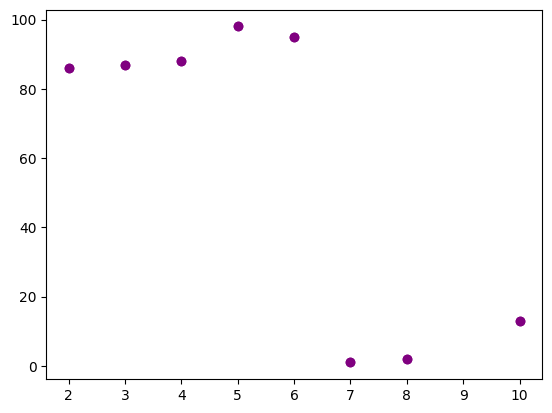

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='purple')
plt.show()

In [17]:
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("Accuracy (R² Score):", model.score(x, y))

Slope: -12.947368421052637
Intercept: 131.5789473684211
Accuracy (R² Score): 0.6015153896107586


In [18]:
y_pred = model.predict(x)
print("Predicted Y values:")
print(y_pred)

Predicted Y values:
[  2.10526316 105.68421053  92.73684211  79.78947368  66.84210526
  53.89473684  40.94736842  28.        ]


In [28]:
 from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=8)
x_poly = poly.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# Accuracy
print("Polynomial R² Score:", poly_model.score(x_poly, y))

Polynomial R² Score: 1.0


In [29]:
y_poly_pred = poly_model.predict(x_poly)
print(y_poly_pred)

[12.99999998 86.00000001 87.00000001 88.00000001 98.00000001 95.
  0.99999999  1.99999999]


In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/home/pccoe/Downloads/Housing.csv")  
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
# Check for categorical columns and convert them to numerical
df = pd.get_dummies(df, drop_first=True)

# Split data into features and target
X = df.drop('price', axis=1)
y = df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print(y_pred)


[5164653.90033967 7224722.29802166 3109863.24240338 4612075.32722559
 3294646.25725955 3532275.09556558 5611774.56836476 6368145.98732718
 2722856.95689985 2629405.61585782 9617039.5031558  2798087.30447888
 3171096.76847063 3394639.09125528 3681088.65424275 5263187.74621485
 3035963.47612384 4786122.8004005  4349551.9200572  3572362.09930451
 5774875.21395649 5886993.57919883 2730836.19518458 4727316.47323635
 5244847.52716801 7555324.21605603 3220790.84680268 5191898.79934206
 8143726.91009786 3398814.09825035 6490693.05027925 3315105.9074781
 6708457.36761326 4201738.21071676 3557571.06735186 5836974.50478626
 4808660.67448475 4362878.73613261 3191242.95701508 4596554.93225238
 4566042.86048411 3517779.52374148 7205844.79365835 3983597.27861103
 3749338.70271056 4274731.09125895 6757442.10783741 4037320.43665851
 3769334.90397126 3417627.44377156 7268416.67644611 2802534.35431384
 4341750.61420452 4516422.15345642 3679997.65037847 2678959.06481152
 7498029.17782458 2920366.45493167 

In [35]:
# Evaluate the model
print("R² Score:", r2_score(y_test, y_pred))
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)



R² Score: 0.6529242642153184
Model Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
Model Intercept: 260032.35760741215


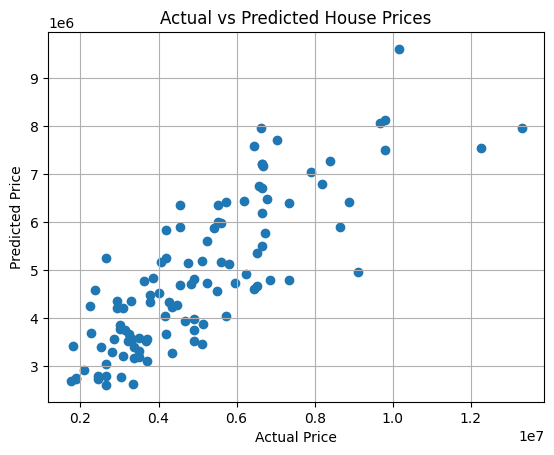

In [34]:
# Plot: Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [45]:
X = df.iloc[:, 0:2]  # First 3 columns as features
y = df['price']      # Target: price
# Train/test split and model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 1.0
